**DETEKSI KECURANGAN MENCONTEK MENGGUNAKAN YOLOV8**



Nabila Asshafa Putri (20090105)

## Konfigurasi Metode YOLOV8


In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.114 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
# Menampilkan data
# Google colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import keras
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import pandas as pd
import cv2
import tensorflow as tf
from PIL import Image
from pathlib import Path
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
#membuat path
path = '/content/gdrive/MyDrive/Colab Notebooks/capstone'
print(path)

/content/gdrive/MyDrive/Colab Notebooks/capstone


In [ ]:
#!nvidia-smi

/bin/bash: nvidia-smi: command not found


## 2. Annotation labels

In [ ]:
#!pwd /content/gdrive/MyDrive/Colab Notebooks/capstone

In [ ]:
%cd {path}

/content/gdrive/MyDrive/Colab Notebooks/capstone


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="hBjfZUcGLBWYUekh2p91")
project = rf.workspace("nabila-asshafa-putri-skigj").project("cheating-exam")
dataset = project.version(5).download("yolov8")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.114, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to cheating-exam-5 in yolov8:: 100%|██████████| 2532/2532 [00:00<00:00, 4290.84it/s]


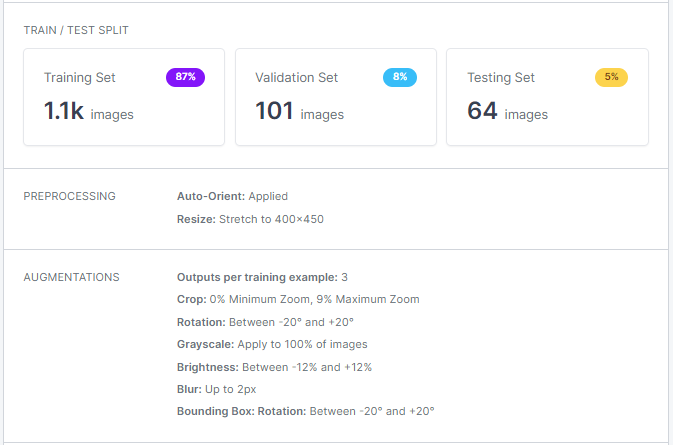

## Training/Pembuatan Model

In [ ]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/capstone/cheating-exam-5'

/content/gdrive/MyDrive/Colab Notebooks/capstone/cheating-exam-5


In [ ]:
!ls -a

data.yaml	    README.roboflow.txt  runs  train  yolov8n.pt
README.dataset.txt  roboflow.zip	 test  valid  yolov8s.pt


In [ ]:
from ultralytics import YOLO

# Muat model YOLO yang telah dilatih sebelumnya (disarankan untuk pelatihan)
model = YOLO("yolov8n.pt")

#Latih data menggunakan set data 'data.yaml' selama 25 kali
model.train(data="/content/gdrive/MyDrive/Colab Notebooks/capstone/cheating-exam-5/data.yaml", epochs=15)

#!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=15 imgsz=640

Ultralytics YOLOv8.0.114 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/Colab Notebooks/capstone/cheating-exam-5/data.yaml, epochs=15, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript,

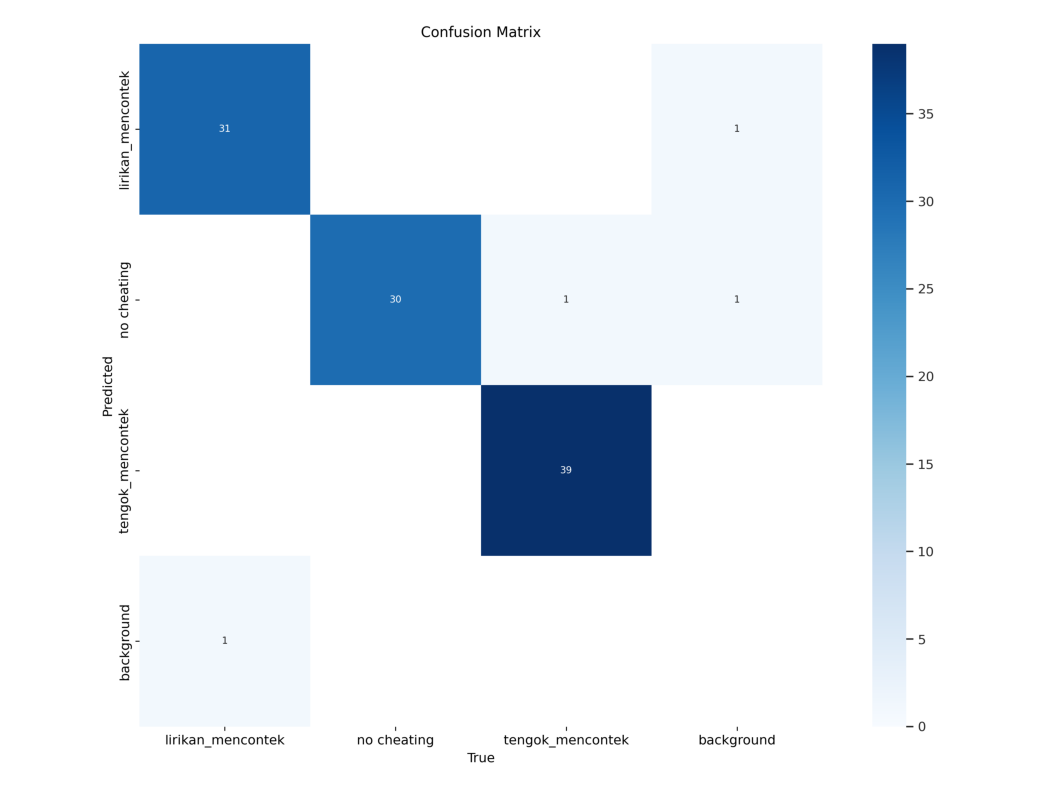

In [ ]:
img = Image.open('/content/gdrive/MyDrive/Colab Notebooks/capstone/cheating-exam-5/runs/detect/train/confusion_matrix.png')
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.axis(False)
plt.show()

>> Confusion matrix adalah metode evaluasi dalam melakukan prediksi. model yang baik memiliki TP(True Posifit) dan TN(True Negativ) yang tinggi. sedangkan FP dan FN rendah.

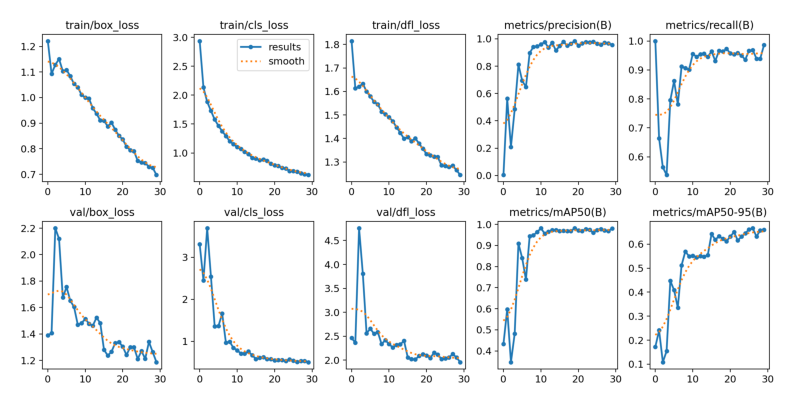

In [ ]:
#grafik model yang sudah di training
img2 = Image.open('/content/gdrive/MyDrive/Colab Notebooks/capstone/cheating-exam-5/runs/detect/train/results.png')
plt.figure(figsize=(10,5))
plt.imshow(img2)
plt.axis(False)
plt.show()

Plot box loss, classification loss, object loss, presisi, perolehan kembali, dan presisi rata-rata rata-rata (mAP) selama masa pelatihan untuk set train dan validasi.

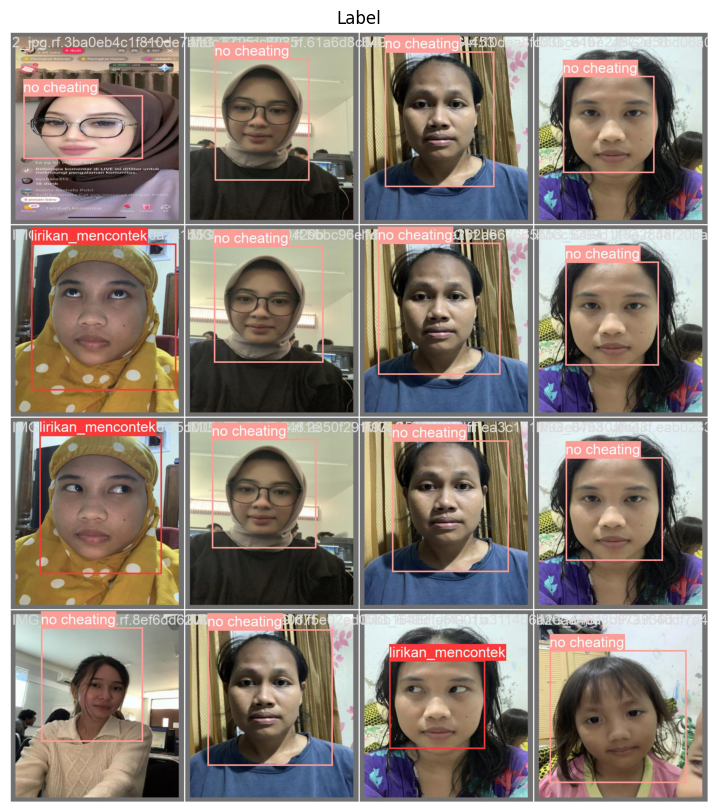

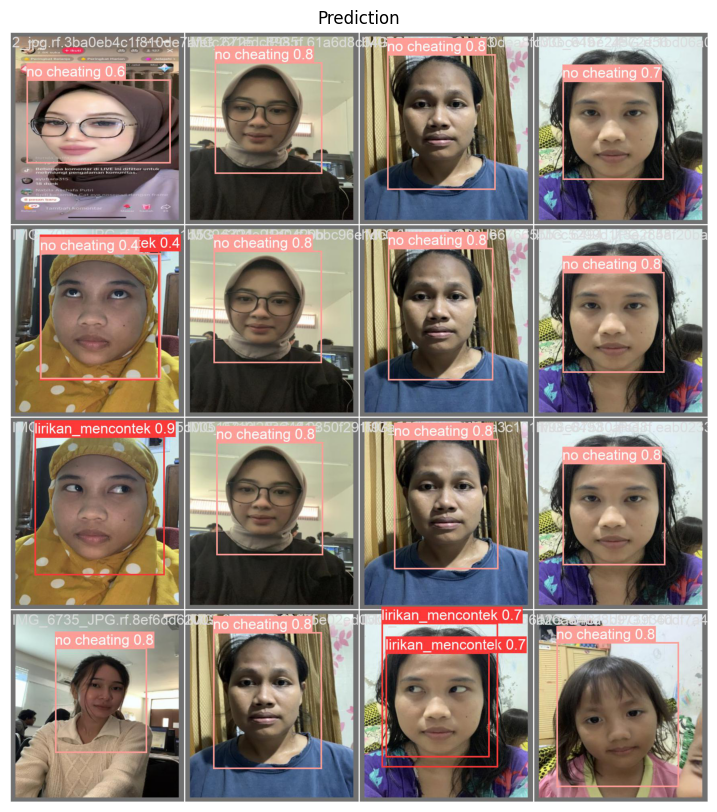

In [ ]:
val_label = Image.open('/content/gdrive/MyDrive/Colab Notebooks/capstone/cheating-exam-5/runs/detect/train/val_batch0_labels.jpg')
val_pred = Image.open('/content/gdrive/MyDrive/Colab Notebooks/capstone/cheating-exam-5/runs/detect/train/val_batch0_pred.jpg')

plt.figure(figsize=(20,10))
plt.imshow(val_label)
plt.title("Label")
plt.axis(False)
plt.show()

plt.figure(figsize=(20,10))
plt.imshow(val_pred)
plt.title("Prediction")
plt.axis(False)
plt.show()

## Validate custom model

In [ ]:
#Evaluasi kinerja model pada set validasi

model.val(data="/content/gdrive/MyDrive/Colab Notebooks/capstone/cheating-exam-5/data.yaml")

Ultralytics YOLOv8.0.114 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients
val: Scanning /content/gdrive/MyDrive/Colab Notebooks/capstone/cheating-exam-5/valid/labels.cache... 101 images, 0 backgrounds, 0 corrupt: 100%|██████████| 101/101 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]
                   all        101        102      0.972      0.933      0.968      0.661
     lirikan_mencontek        101         32      0.965      0.906      0.932      0.646
           no cheating        101         30      0.968      0.993      0.994      0.708
      tengok_mencontek        101         40      0.983        0.9      0.977       0.63
Speed: 6.8ms preprocess, 10.4ms inference, 0.0ms loss, 7.1ms postprocess per image
Results saved to runs/detect/val2


ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7f7caa5856c0>
fitness: 0.6918950639708552
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.64566,     0.70847,     0.62959])
names: {0: 'lirikan_mencontek', 1: 'no cheating', 2: 'tengok_mencontek'}
plot: True
results_dict: {'metrics/precision(B)': 0.9717766564233189, 'metrics/recall(B)': 0.9330160841203865, 'metrics/mAP50(B)': 0.9677582916302477, 'metrics/mAP50-95(B)': 0.6612435942309227, 'fitness': 0.6918950639708552}
save_dir: PosixPath('runs/detect/val2')
speed: {'preprocess': 6.7853715160105486, 'inference': 10.380003711964825, 'loss': 0.001874300512937036, 'postprocess': 7.11553403646639}

>> Nampak terlihat bahwa dengan hyperparameter tuning untuk epoch dengan nilai 15 menghasilkan nilai precision = 0.97, recall=0.93 dan mAP= 0.96.